In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
netflix = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

In [3]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [5]:
netflix.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
netflix.shape

(7787, 12)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 10]

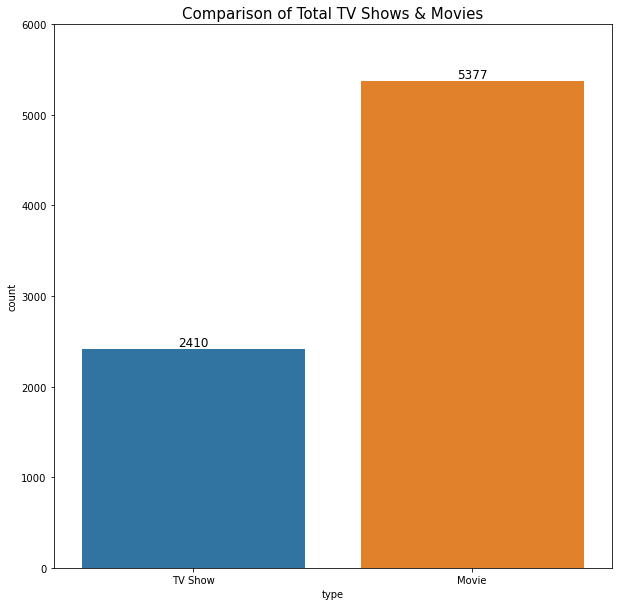

In [8]:
import math
def roundup(x):
    return 100 + int(math.ceil(x / 100.0)) * 100 
sns.countplot(x='type',data=netflix)
# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = netflix['type'].value_counts().max() 
ax.set_ylim([0, 6000])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('Comparison of Total TV Shows & Movies',size='15')
plt.show()

In [9]:
movies = netflix[netflix.type == 'Movie']
shows = netflix[netflix.type == 'TV Show']

# Movies Analysis

In [10]:
movies['release_year'].unique()

array([2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015, 2020,
       2010, 2005, 2012, 2006, 2013, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       1973, 1967, 1960, 1981, 1958, 1976, 2021, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1942, 1969, 1955, 1963, 1964,
       1954, 1970, 1944, 1947, 1959, 1943])

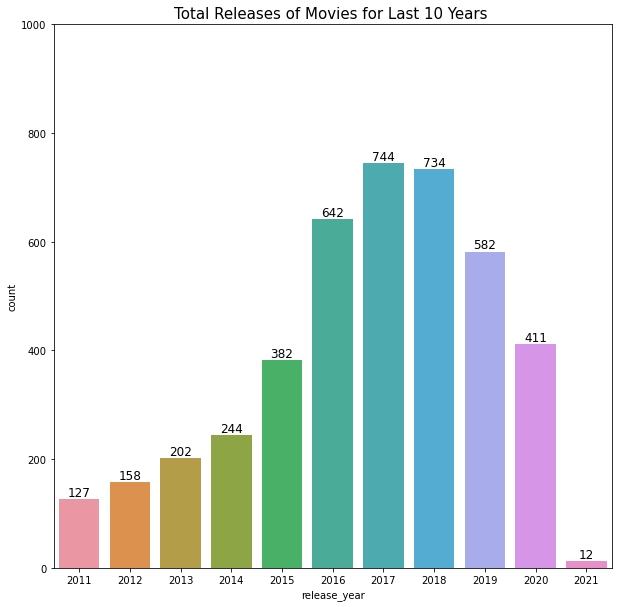

In [11]:
recent_5yrs = movies[movies.release_year >= 2011]
sns.countplot(x='release_year',data=recent_5yrs)

# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = recent_5yrs['type'].value_counts().max() 
ax.set_ylim([0,1000])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('Total Releases of Movies for Last 10 Years ',size='15')    
plt.show()

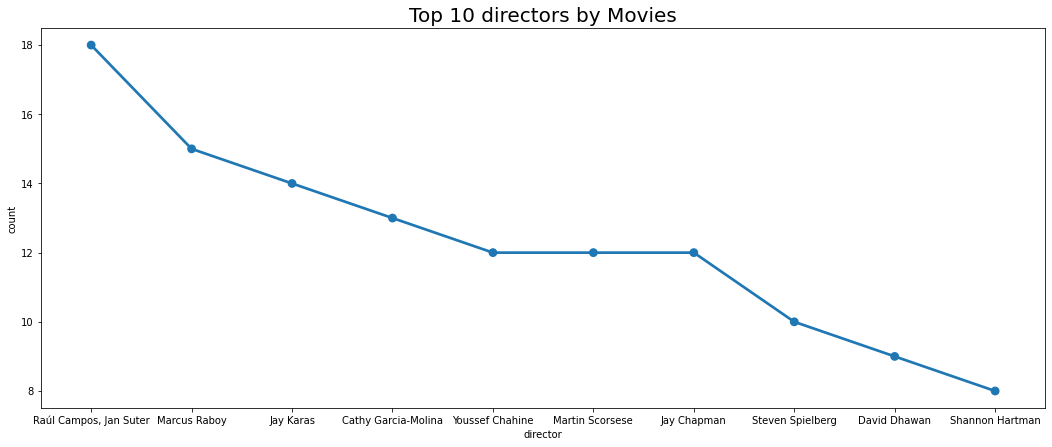

In [12]:
top_director = movies.groupby(['director'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='director',y='count',data=top_director.head(10))
plt.title('Top 10 directors by Movies',size='20')
plt.show()

# Different category ratings denotes the following
**Kids**
TV-Y
Designed to be appropriate for all children

TV-Y7
Suitable for ages 7 and up

G
Suitable for General Audiences

TV-G
Suitable for General Audiences

PG
Parental Guidance suggested

TV-PG
Parental Guidance suggested

**Teens**
PG-13
Parents strongly cautioned. May be Inappropriate for ages 12 and under.

TV-14
Parents strongly cautioned. May not be suitable for ages 14 and under.

**Adults**
R
Restricted. May be inappropriate for ages 17 and under.

TV-MA
For Mature Audiences. May not be suitable for ages 17 and under.

NC-17
Inappropriate for ages 17 and under

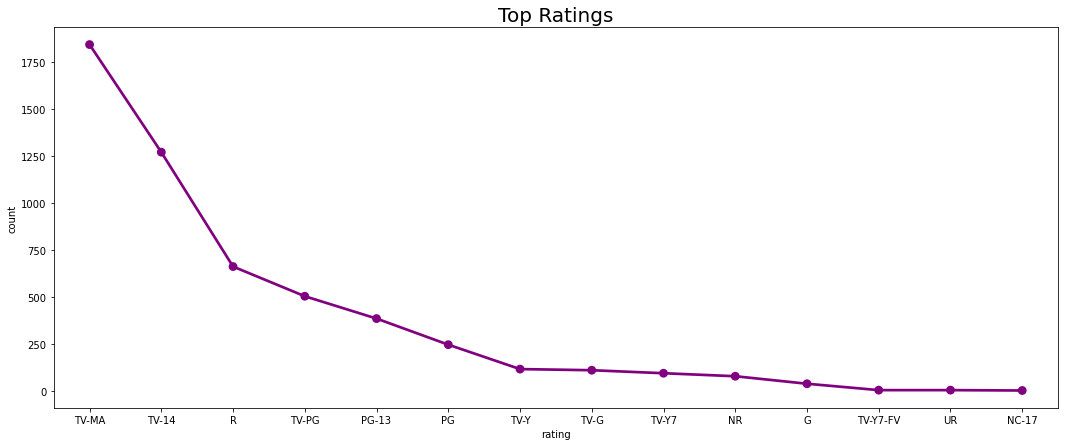

In [13]:
top_ratings = movies.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=top_ratings,color='purple')
plt.title('Top Ratings',size='20')
plt.show()

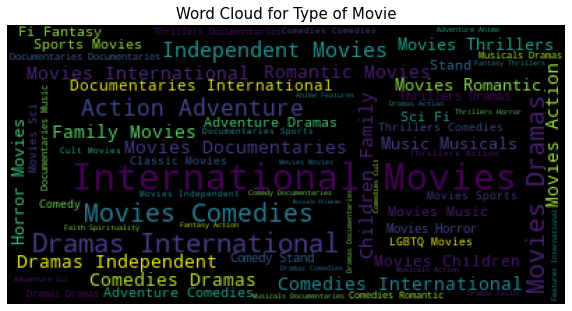

In [14]:
from wordcloud import WordCloud, STOPWORDS
text3 = ' '.join(movies['listed_in'])
wordcloud2 = WordCloud().generate(text3)
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.title('Word Cloud for Type of Movie',size='15')
plt.show()

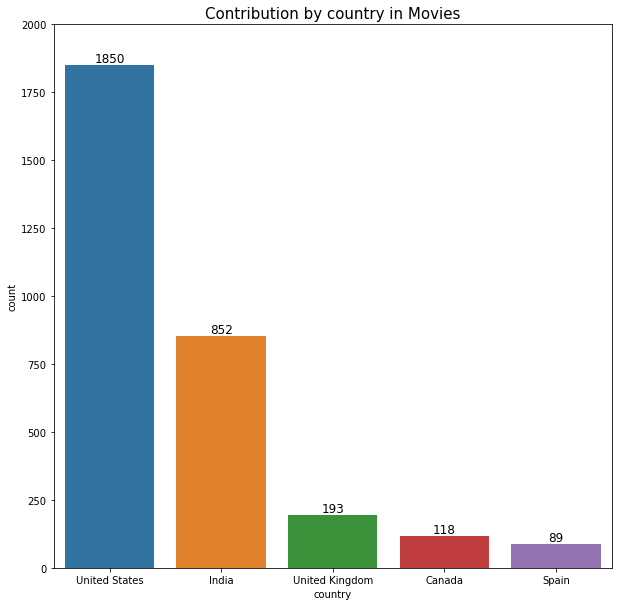

In [15]:
top_contributors = movies.groupby(['country'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
sns.barplot(x='country',y='count',data=top_contributors.head(5))
# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = top_contributors['country'].value_counts().max() 
ax.set_ylim([0,2000])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('Contribution by country in Movies',size='15')    
plt.show()

# Let's see the Trends of the country which invented Netflix (USA)

In [16]:
usa = netflix[netflix.country == 'United States']
usa.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",2017,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,"March 19, 2020",2019,R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...


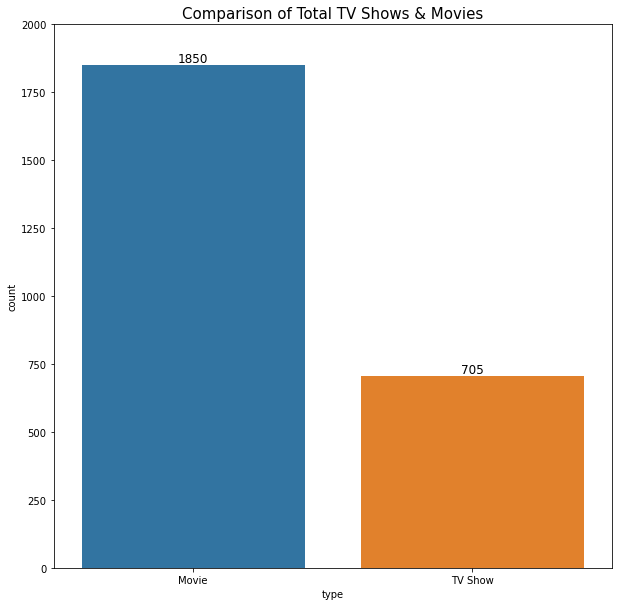

In [17]:
sns.countplot(x='type',data=usa)
# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = usa['type'].value_counts().max() 
ax.set_ylim([0, 2000])
# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('Comparison of Total TV Shows & Movies',size='15')
plt.show()

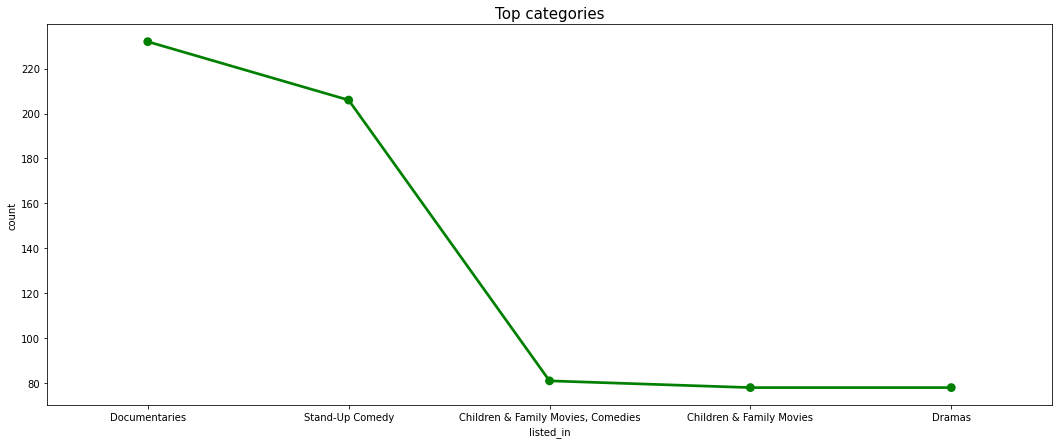

In [18]:
top_cat = usa.groupby(['listed_in'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='listed_in',y='count',data=top_cat.head(5),color='green',ax=ax)
plt.title('Top categories',size='15')
plt.show()

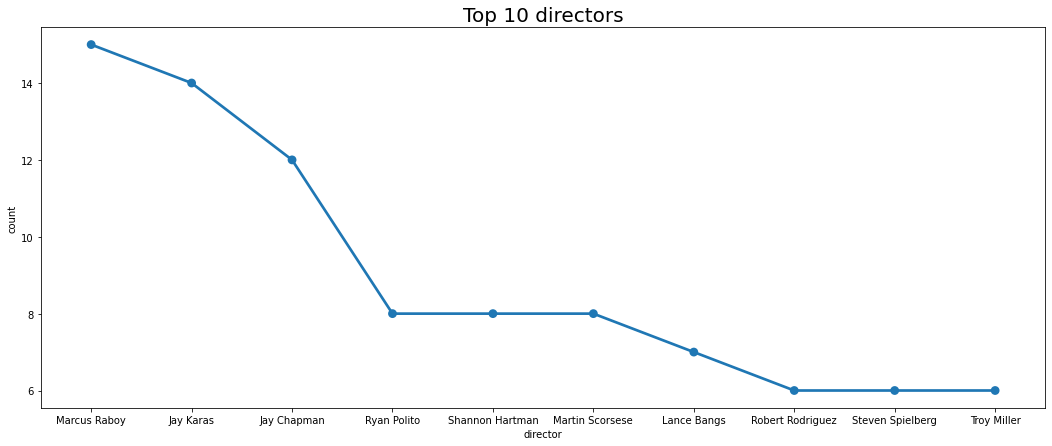

In [19]:
top_director = usa.groupby(['director'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='director',y='count',data=top_director.head(10))
plt.title('Top 10 directors',size='20')
plt.show()

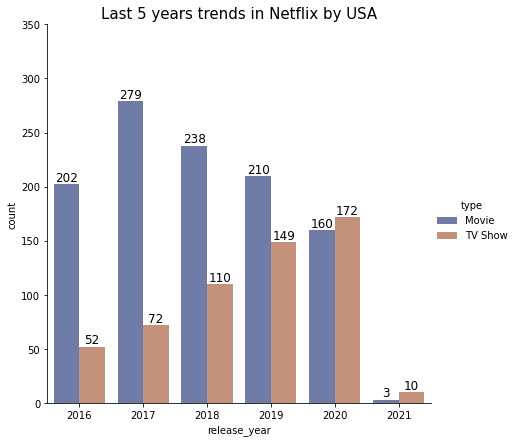

In [20]:
usa_recent5 =  usa[usa.release_year >= 2016]
g = sns.catplot(
    data=usa_recent5, kind="count",
    x="release_year", hue="type",
    ci="sd", palette="dark", alpha=.6, height=6)
ax = plt.gca()

# ylim max value to be set
y_max = usa_recent5['type'].value_counts().max() 
ax.set_ylim([0, 350])
# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('Last 5 years trends in Netflix by USA',size='15')
plt.show()

## Thank You! Drop an upvote if you liked the kernel! :)